<a href="https://colab.research.google.com/github/nastyakurzanova/machine-learning/blob/rk1/Kurzanova_rk1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Рубежный контроль 1
Курзанова Анастасия ИУ5-61Б
ТМО

In [2]:
# Импортируем все библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [3]:
# Выведим первые 5 строк датасета

data = pd.read_csv('HousingData.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


##Колонки
CRIM: Преступность на душу населения по индексу преступности.

ZN: Доля недвижимости, занятой коммерческими заведениями, процент.

INDUS: Доля недвижимости, занятой промышленностью, процент.

CHAS: Число домов с бассейном (0 = нет, 1 = да).

NOX: Концентрация нитрогенных оксидов, части на миллион.

RM: Среднее количество комнат в доме.

AGE: Процент домов, построенных до 1940 года.

DIS: Расстояние до пяти центров города, мили.

RAD: Индекс доступа к радио (1 = 250 кВт или больше, 2 = менее 250 кВт).

TAX: Средний налог на имущество в $10,000.

PTRATIO: Соотношение числа учащихся в начальной школе к числу учеников в старшей школе.

B: 1000(Bk — 0.63)^2, где Bk — доход на душу населения в $10,000.

LSTAT: Процент семей с доходом ниже среднего.

MEDV: Средняя стоимость домашних цен в $1000

In [4]:
# Размер
data.shape

(506, 14)

In [5]:

# Список колонок с типами данных
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
# Проверим наличие пустых значений
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

CRIM - 20
ZN - 20
INDUS - 20
CHAS - 20
NOX - 0
RM - 0
AGE - 20
DIS - 0
RAD - 0
TAX - 0
PTRATIO - 0
B - 0
LSTAT - 20
MEDV - 0


In [7]:
# Удаление строк, содержащих пустые значения
cleaned_df = data.dropna(axis=0, how='any')
(data.shape, cleaned_df.shape)

((506, 14), (394, 14))

Было 506 строк, стало 394 после удаления строк

In [8]:
for col in cleaned_df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = cleaned_df[cleaned_df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))
total_count = cleaned_df.shape[0]
print('Всего строк: {}'.format(total_count))

CRIM - 0
ZN - 0
INDUS - 0
CHAS - 0
NOX - 0
RM - 0
AGE - 0
DIS - 0
RAD - 0
TAX - 0
PTRATIO - 0
B - 0
LSTAT - 0
MEDV - 0
Всего строк: 394


In [9]:
unique_values = cleaned_df['MEDV'].unique()

print("Уникальные значения для целевого признака MEDV:")
print(unique_values)

Уникальные значения для целевого признака MEDV:
[24.  21.6 34.7 33.4 28.7 27.1 16.5 15.  18.9 21.7 20.4 19.9 23.1 17.5
 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8 18.4 21.  12.7 13.2
 13.1 13.5 24.7 30.8 34.9 26.6 25.3 21.2 19.3 20.  14.4 19.4 19.7 25.
 35.4 31.6 23.3 18.7 16.  22.2 33.  23.5 22.  17.4 20.9 24.2 22.8 21.4
 20.8 28.  23.9 24.8 22.9 22.5 23.6 22.6 20.6 28.4 38.7 43.8 33.2 27.5
 26.5 18.6 20.1 19.5 19.8 18.8 18.5 19.2 20.3 20.5 16.2 18.  14.3 23.
 18.1 17.1 17.8 14.  13.4 11.8 13.8 15.4 17.  24.3 27.  50.  22.7 23.8
 22.3 19.1 29.4 23.2 29.9 37.2 39.8 36.2 37.9 26.4 29.6 32.  29.8 37.
 29.1 30.3 34.6 32.9 24.1 42.3 48.5 24.4 22.4 28.1 23.7 21.5 26.7 30.1
 44.8 31.7 41.7 29.  31.5 17.6 24.5 26.2 42.8 44.  36.  33.8 43.1 31.
 36.5 43.5 20.7 21.1 35.2 32.4 35.1 45.4 46.  32.2 28.5 37.3 28.6 36.1
 28.2 16.1 22.1 24.6 19.  32.7 17.2 16.8 21.9 13.3 10.2 10.4 10.9 11.3
  8.8  7.2 10.5  7.4 11.5 15.1  9.7 12.5  8.5  5.   6.3  5.6 12.1  8.3
 17.9 16.3  7.   7.5  8.4 16.7 14

<Axes: xlabel='LSTAT', ylabel='RM'>

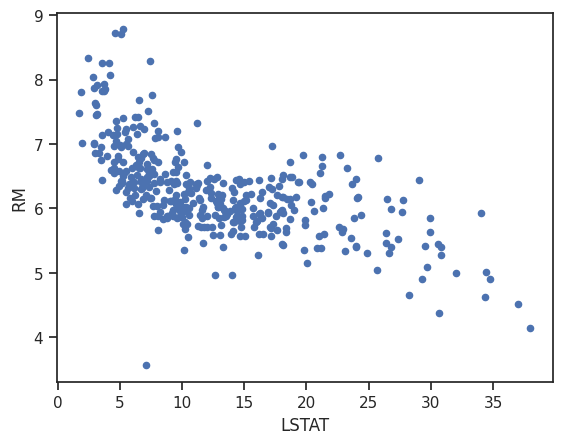

In [10]:
# Задание для группы
# Для студентов групп ИУ5-61Б, ИУ5Ц-81Б - для пары произвольных колонок данных построить график "Диаграмма рассеяния".
cleaned_df = pd.DataFrame(cleaned_df)
cleaned_df.plot.scatter(x = "LSTAT", y = "RM")

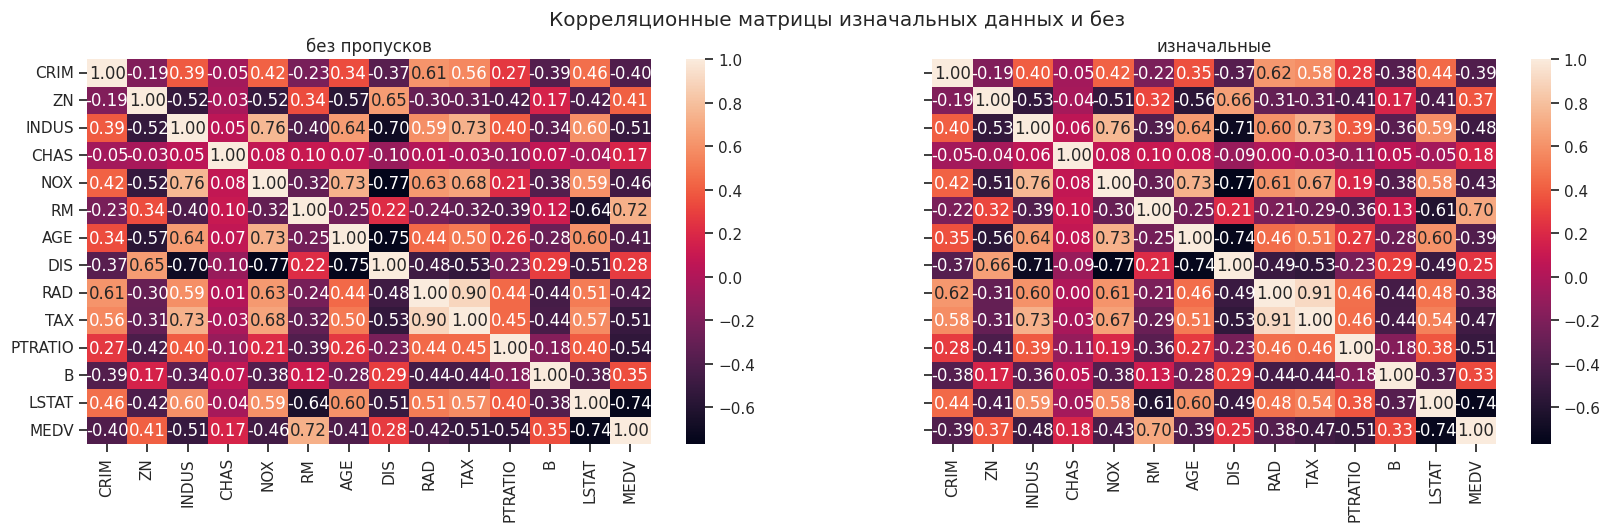

In [11]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20,5))
sns.heatmap(cleaned_df.corr(), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(), ax=ax[1], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы изначальных данных и без')
ax[0].title.set_text('без пропусков')
ax[1].title.set_text('изначальные')

# Вывод

Думаю, что признаки RM, LSTAT, и PTRATIO имеют базовую закономерность MEDV, что может свидетельствовать об их новизне в моделях.
А для улучшения модели можно использовать методы выбора критериев.
Выбор моделей машинного обучения зависит от типа задач (классификация, регрессия) и данных.
После выбора моделей и признаков можно использовать методы оценки важности признаков для понимания вклада каждого признака в модели предсказания.
Также эффективность модели зависит не только от выбора критериев, но и от выбора предварительной обработки машинного обучения, а также от обработки данных.